In [1]:
import pandas as pd

In [7]:
def parse_ycsb_results(file_path):
    data = []  # List to hold all data tuples

    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()
            if line.startswith("["):  # Ensures that the line conforms to the expected format
                try:
                    metric_info, value = line.split(", ", 1)
                    metric = metric_info.strip('[]')
                    if ", " in value:  # Check if there is a valid split point
                        attribute, value = value.split(", ", 1)
                        # Attempt to convert value to float, handle differently if 'Return' is in attribute
                        value = float(value) if 'Return' not in attribute else value
                        data.append((metric, attribute, value))
                    else:
                        print(f"Skipped line due to unexpected format: {line}")
                except ValueError as e:
                    print(f"Error parsing line: {line} - {e}")

    return pd.DataFrame(data, columns=['Metric', 'Attribute', 'Value'])

In [12]:
df_db1 = parse_ycsb_results('sa_cassandra.txt')
df_db2 = parse_ycsb_results('sa_mongo.txt')
df_db3 = parse_ycsb_results('sa_mysql.txt')

In [13]:
import matplotlib.pyplot as plt

In [21]:
df_db1['Database'] = 'cassandra'
df_db2['Database'] = 'Mongo'
df_db3['Database'] = 'MySQL'

# Combine all three dataframes into one
df = pd.concat([df_db1, df_db2, df_db3])
# Combine 'Metric' and 'Attribute' into one column for clear headers
df['Metric_Attribute'] = df['Metric'] + "_" + df['Attribute']

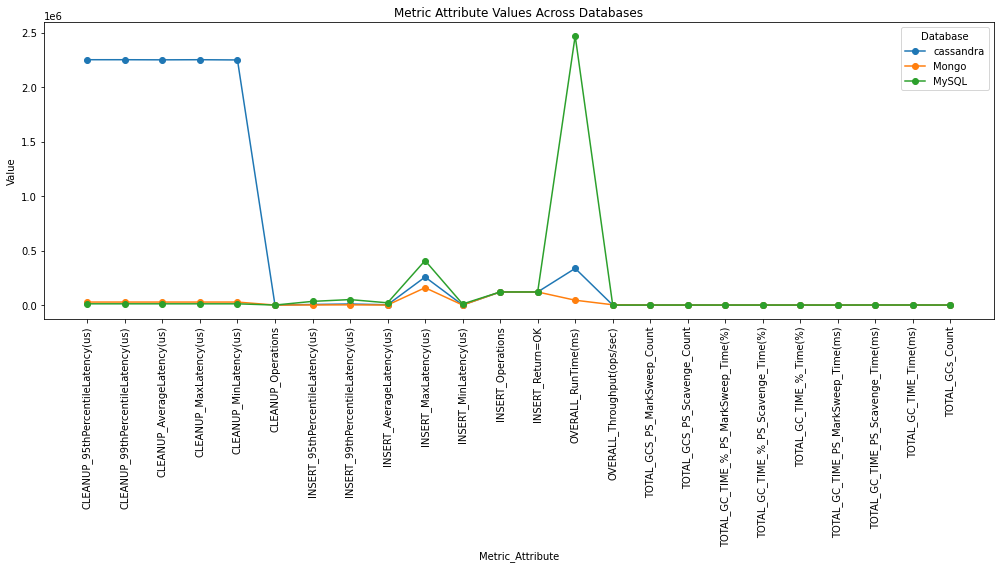

In [29]:
# Unique databases
databases = df['Database'].unique()

# Set up the plot
plt.figure(figsize=(14, 8))

# Plot each database's metrics
for db in databases:
    # Filter the DataFrame for the current database
    subset = df[df['Database'] == db]
    
    # Sort values by 'Metric_Attribute' if there is a preferred order or just to keep the x-axis consistent across plots
    subset = subset.sort_values('Metric_Attribute')
    
    # Plot
    plt.plot(subset['Metric_Attribute'], subset['Value'], marker='o', label=db)

# Adding plot details
plt.xlabel('Metric_Attribute')
plt.ylabel('Value')
plt.title('Metric Attribute Values Across Databases')
plt.xticks(rotation=90)  # Rotate labels for better readability
plt.legend(title='Database')
plt.tight_layout()  # Adjust layout to make room for label rotation
plt.show()

In [35]:
df_db1 = parse_ycsb_results('ts_cassandra.txt')
df_db2 = parse_ycsb_results('ts_mongo.txt')
df_db3 = parse_ycsb_results('ts_mysql.txt')

In [36]:
df_db1['Database'] = 'cassandra'
df_db2['Database'] = 'Mongo'
df_db3['Database'] = 'MySQL'

# Combine all three dataframes into one
df1 = pd.concat([df_db1, df_db2, df_db3])
# Combine 'Metric' and 'Attribute' into one column for clear headers
df1['Metric_Attribute'] = df1['Metric'] + "_" + df1['Attribute']

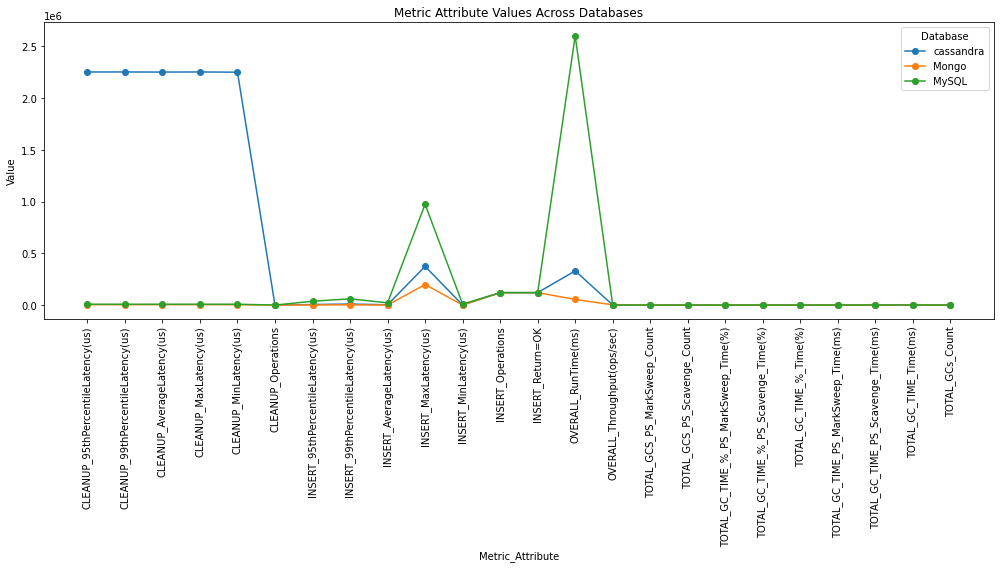

In [37]:
# Unique databases
databases = df1['Database'].unique()

# Set up the plot
plt.figure(figsize=(14, 8))

# Plot each database's metrics
for db in databases:
    # Filter the DataFrame for the current database
    subset = df1[df1['Database'] == db]
    
    # Sort values by 'Metric_Attribute' if there is a preferred order or just to keep the x-axis consistent across plots
    subset = subset.sort_values('Metric_Attribute')
    
    # Plot
    plt.plot(subset['Metric_Attribute'], subset['Value'], marker='o', label=db)

# Adding plot details
plt.xlabel('Metric_Attribute')
plt.ylabel('Value')
plt.title('Metric Attribute Values Across Databases')
plt.xticks(rotation=90)  # Rotate labels for better readability
plt.legend(title='Database')
plt.tight_layout()  # Adjust layout to make room for label rotation
plt.show()